# Perceptron

### Initialisation

In [1]:
n_samples = 500
mu1 = [2, 2]
sigma1 = [[0.9, -0.0255], [-0.0255, 0.9]]
mu2 = [5, 5]
sigma2 = [[0.5, 0], [0, 0.3]]

learning_rate = 0.1
bias = 1
epochs = 1000

### Importing Libraries

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

## Generating Synthetic Data

In [5]:
np.random.seed(0)


X1 = np.random.multivariate_normal(mu1, sigma1, n_samples)
X2 = np.random.multivariate_normal(mu2, sigma2, n_samples)

### Combining Both Classes

In [6]:
# combining both classes and their labels into one dataset
X = np.vstack((X1, X2))
y = np.hstack((np.ones(n_samples), -np.ones(n_samples)))

### Adding Bias

In [9]:
X = np.hstack((bias * np.ones((2 * n_samples, 1)), X))
X

array([[1.        , 1.06459399, 3.46461297],
       [1.        , 2.81599432, 4.14758164],
       [1.        , 0.08335619, 2.62419612],
       ...,
       [1.        , 5.13988564, 5.05354032],
       [1.        , 5.99102671, 5.08677779],
       [1.        , 4.19255376, 4.28195196]])

### Splitting the Data

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Perceptron

In [11]:
def perceptron(X, y, learning_rate, epochs):
    # initializing weights
    w = np.zeros(X.shape[1])
    # initializing empty list to store errors
    errors = []
    # iterating over epochs
    for epoch in range(epochs):
        # initializing error
        error = 0
        # iterating over all data points
        for i in range(X.shape[0]):
            # calculating predicted value
            y_hat = np.sign(np.dot(X[i], w))
            # calculating error
            e = y[i] - y_hat
            # updating weights
            w = w + learning_rate * e * X[i]
            # adding error to list
            error += e**2
        # appending error to list
        errors.append(error)
    return w, errors

### Defining a Step Activation Function

In [12]:
def step(x):
    return np.where(x >= 0, 1, -1)

## Training the Perceptron

In [14]:
# training perceptron
w, errors = perceptron(X_train, y_train, learning_rate, epochs)

### Hyperparameter Tuning

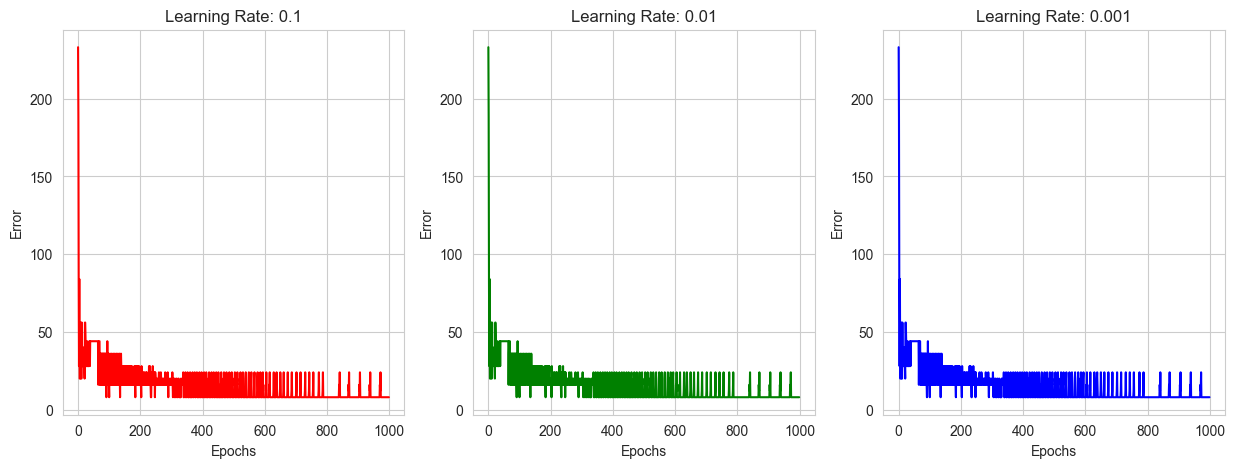

In [33]:
# hyperparameter tuning
learning_rates = [0.1, 0.01, 0.001]
epochs = 1000
colors = ['r', 'g', 'b']

# plotting the errors for different learning rates in subplots
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

for i, learning_rate in enumerate(learning_rates):
    # training perceptron
    w, errors = perceptron(X_train, y_train, learning_rate, epochs)
    # plotting error curve
    ax[i].plot(errors, colors[i])
    ax[i].set_title('Learning Rate: {}'.format(learning_rate))
    ax[i].set_xlabel('Epochs')
    ax[i].set_ylabel('Error')

## Testing the Perceptron

In [15]:
# testing perceptron
y_pred = step(np.dot(X_test, w))

# calculating accuracy
accuracy = np.sum(y_pred == y_test) / len(y_test)
print("Accuracy:", accuracy)

Accuracy: 1.0


## Plotting the Decision Boundary

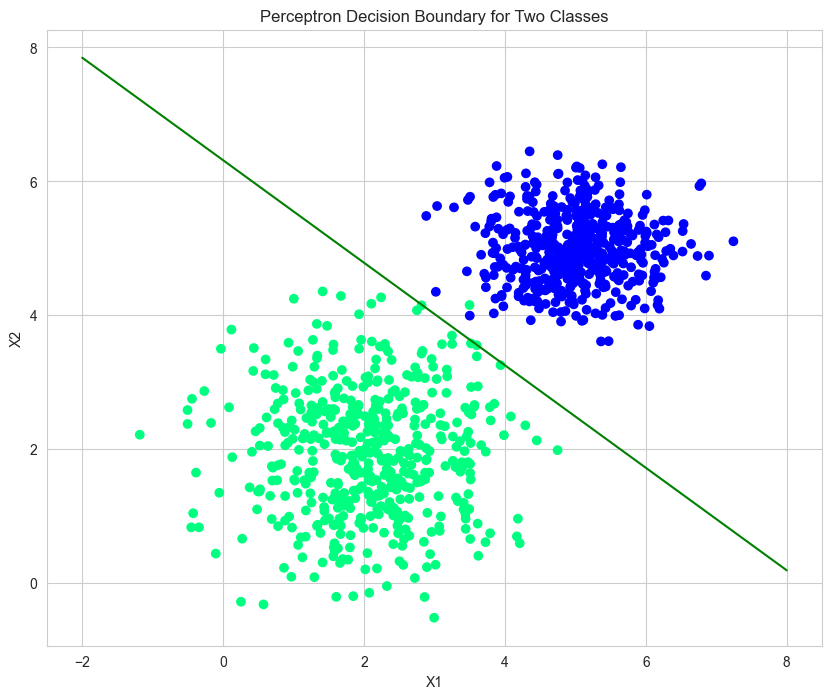

In [29]:
# plotting decision boundary
x1 = np.linspace(-2, 8, 100)
x2 = -(w[0] + w[1] * x1) / w[2]

# plotting with seaborn
sns.set_style("whitegrid")
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 1], X[:, 2], c=y, cmap="winter")
plt.plot(x1, x2, c="green")
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Perceptron Decision Boundary for Two Classes")
plt.show()

### Confusion Matrix Plot

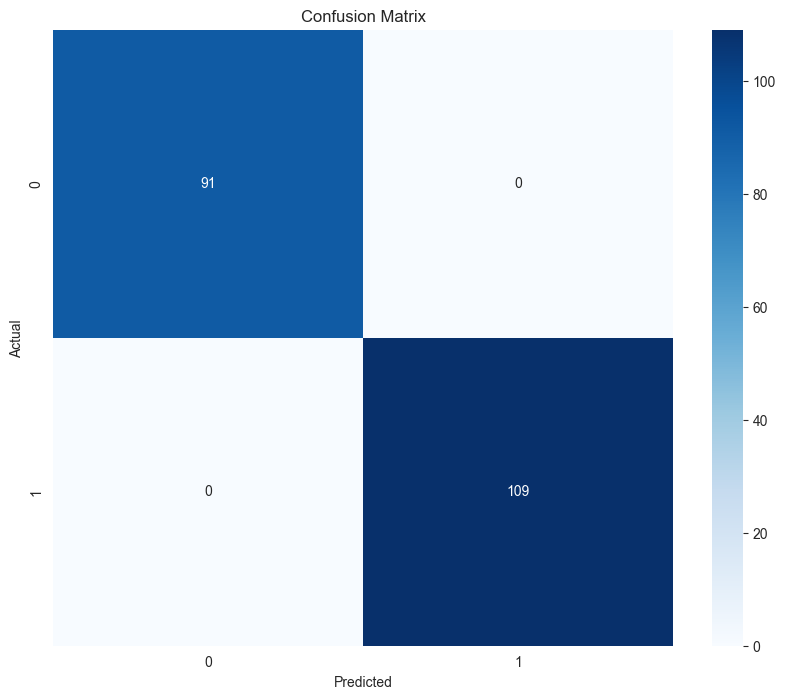

In [26]:
# plotting confusion matrix
cm = confusion_matrix(y_test, y_pred)

# plotting with seaborn
sns.set_style("whitegrid")
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d") 

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()